In [33]:
!pip install imblearn

/home/henock/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/henock/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
     |████████████████████████████████| 199 kB 503 kB/s eta 0:00:01


    • Contexte : 
Nous sommes dans le contexte des crédits bancaires, notre travail consiste donc à prédire le client éligible  ou non éligible pour l’octroi du crédit suivant son comportement, c.à.d. ses différentes actions sur les différentes variables de l’ensemble de données en notre possession. Ici les clients éligibles sont jugés crédibles et inéligibles sont jugés non crédibles.

    • Contenu
    
L’ensemble de données en notre possession concerne les données bancaires ayant 1000 lignes et 8 Colonnes. Les lignes représentent donc les clients enregistrés et 8 Colonnes représentent les différentes variables sur lesquelles est observée l’éligibilité des clients sur les prêts bancaires.
Ces différentes variables sont les suivantes : 

    • Solde compte : Renferme les informations relatives à la balance disponible du compte client

    • Moyen Retrait : Renferme les informations en montant de l’opération transactionnelle de retrait dans une période donnée.

    • Moyen Dépôt : Renferme les informations en montant de l’opération 
    • Montant transactionnelle de dépôt dans une période donnée.

    • Montant remboursé : Renferme les informations en montant remboursé au cours période t pour un prêt effectué.

    • Revenu mensuel : Renferme les informations en moment du revenu au cours d’une période mensuelle.

    • Délais mois : Renferme les informations en nombre exprimant une période donnée.

    • Classes : Renferme les classes d’appartenance des clients par rapport à son état d’éligibilité pour l’octroi des crédits. 


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score, validation_curve,  train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE 

# IMPORTATION DES DONNEES

In [19]:
data= pd.read_csv('profil_client.csv')
bd = data.copy()
#pd.set_option('display.max_row', 13)
#pd.set_option('display.max_columns', 13)
bd

,Solde_Compte,Moyen_Retrait,Moyen_Depot,Motant_Credit,Montant_Rembourser,Revenu_Mensuel,Delai_Mois,Classes
0,578,100,678,4396,6280,2000,2,1
1,718,1098,818,4396,6280,2000,3,1
2,858,1238,958,2813,4018,2000,1,1
3,998,1378,1098,2813,4018,2000,3,1
4,1138,1518,1238,2813,4018,2000,2,1
...,...,...,...,...,...,...,...,...
995,30820,31170,30920,2853,4076,700,1,2
996,30850,31200,30950,3457,4939,700,2,2
997,31070,31420,31170,3457,4939,700,2,2
998,31100,100,31200,3457,4939,700,1,1


# EXPLORATION DES DONNEES

## Analyse de Forme

In [20]:
bd.shape

(1000, 8)

In [21]:
bd.dtypes

Solde_Compte          int64
Moyen_Retrait         int64
Moyen_Depot           int64
Motant_Credit         int64
Montant_Rembourser    int64
Revenu_Mensuel        int64
Delai_Mois            int64
Classes               int64
dtype: object

## Analyse de Fond

In [22]:
bd['Classes'].value_counts(normalize=True)

1    0.65
2    0.35
Name: Classes, dtype: float64

In [23]:
bd.isnull().sum().sort_values(ascending = False)

Classes               0
Delai_Mois            0
Revenu_Mensuel        0
Montant_Rembourser    0
Motant_Credit         0
Moyen_Depot           0
Moyen_Retrait         0
Solde_Compte          0
dtype: int64

### Analyde des crédits par rapport au revenu

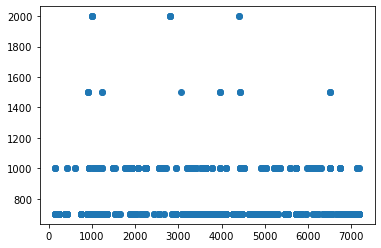

In [24]:
var_x1= data.iloc[:,3] 
var_X2= data.iloc[:,5]
plt.scatter(var_x1,var_X2)

/home/henock/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


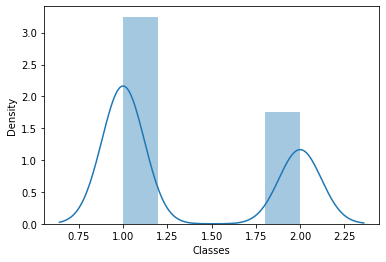

In [25]:
sns.distplot(bd['Classes'])

### Analyse de la crédibilité

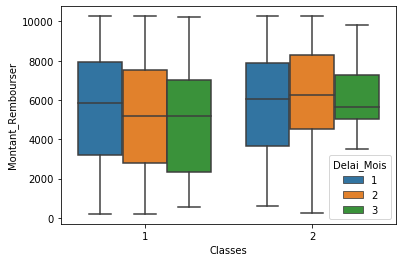

In [26]:
sns.boxplot(x='Classes', y='Montant_Rembourser', hue = 'Delai_Mois', data=bd)

In [27]:
#sns.countplot(x='Moyen_Retrait', hue = 'Solde_Compte', data=bd)

In [28]:
pd.crosstab(bd['Classes'], bd['Motant_Credit'])

Motant_Credit,144,194,228,237,381,419,598,740,885,905,...,7007,7036,7044,7065,7072,7125,7132,7139,7179,7183
Classes,,,,,,,,,,,,,,,,,,,,,
1,10,0,3,6,6,3,3,11,6,8,...,0,0,0,0,6,2,3,2,0,2
2,0,3,0,0,0,6,0,0,0,2,...,2,3,6,4,2,0,0,0,12,5


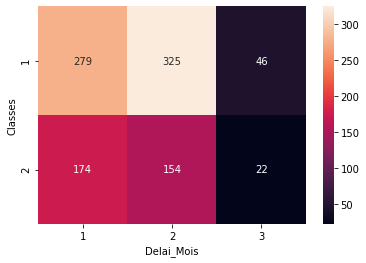

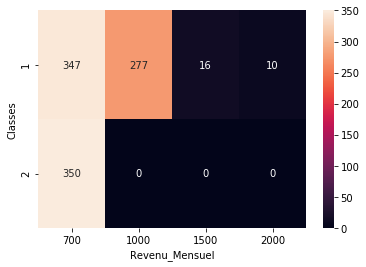

In [12]:
for col in bd[['Delai_Mois','Revenu_Mensuel']]:
    plt.figure()
    sns.heatmap(pd.crosstab(bd['Classes'], bd[col]), annot=True, fmt='d')

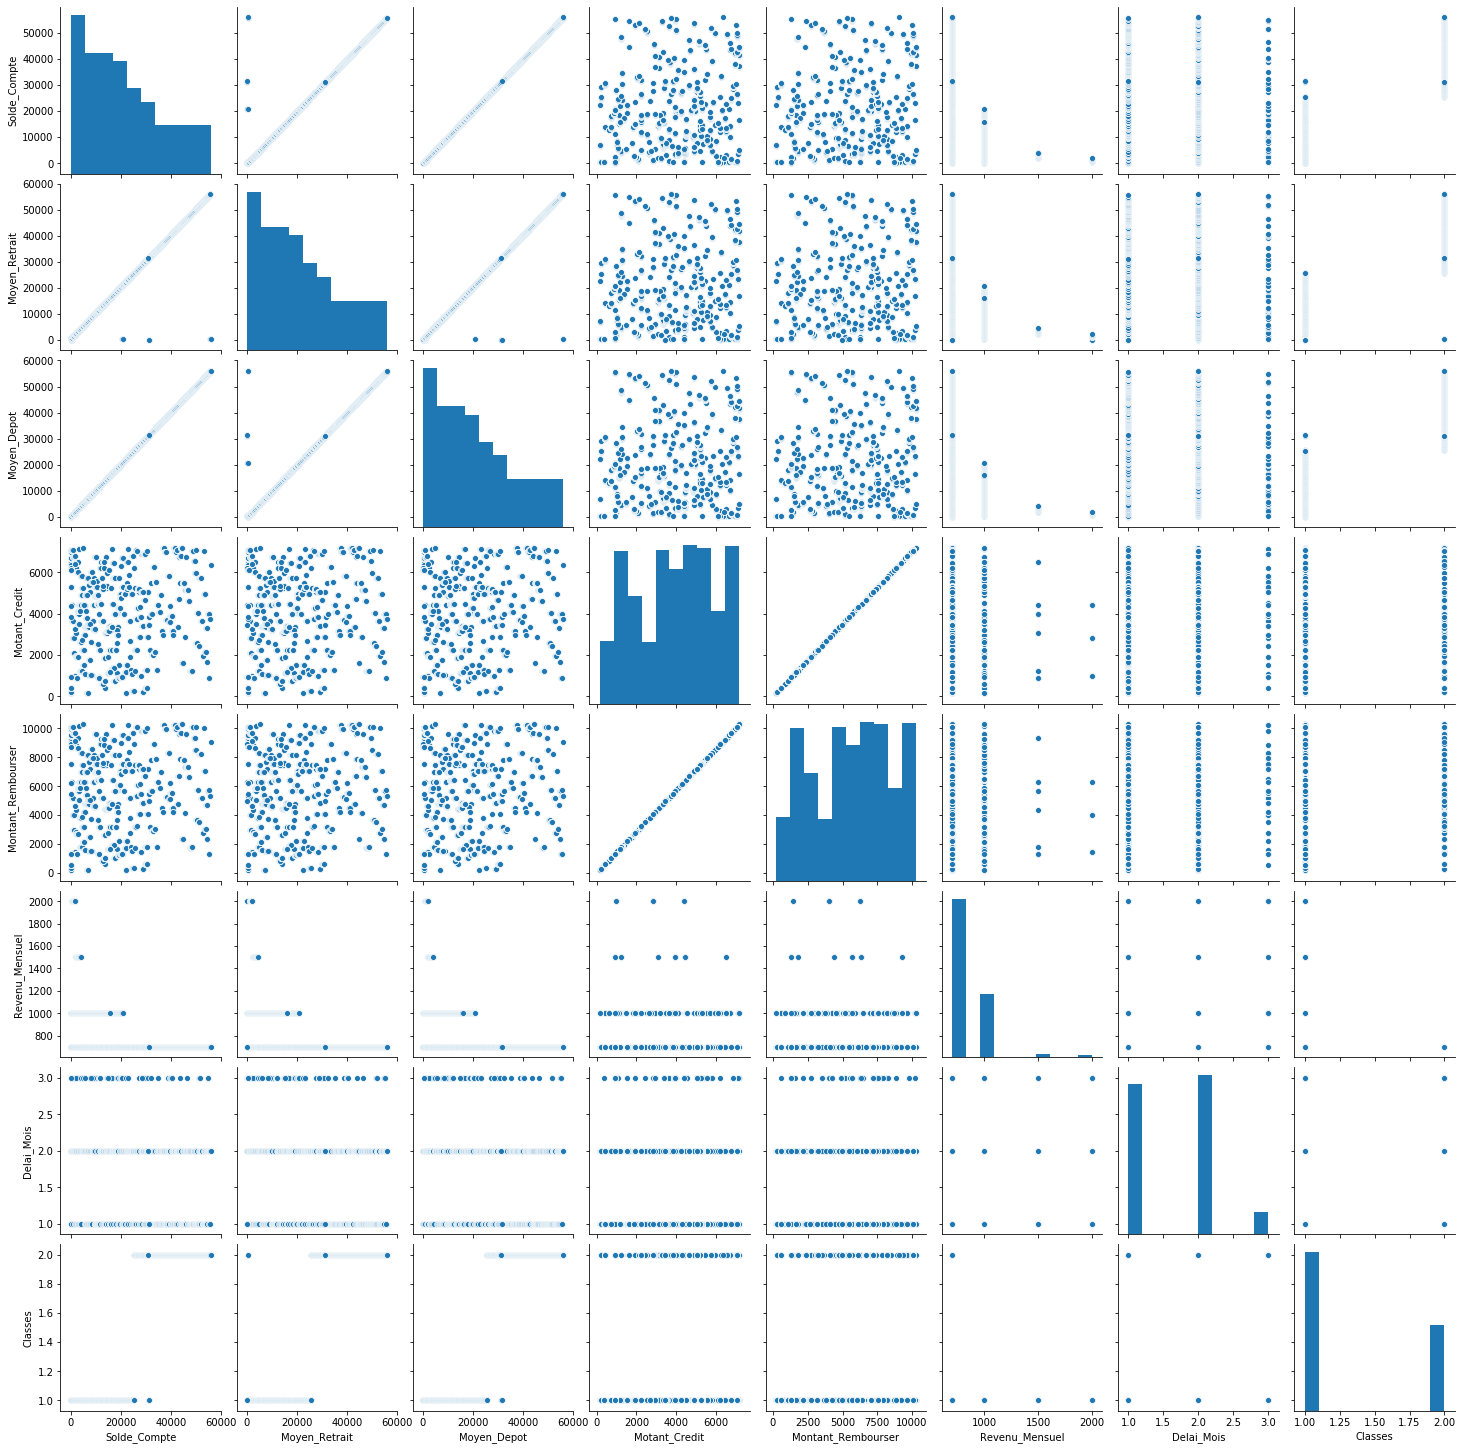

In [13]:
sns.pairplot(bd)

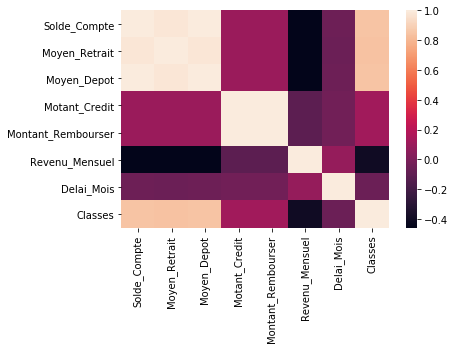

In [14]:
sns.heatmap(bd.corr())

# PRETRAITEMENT DES DONNEES

### Imputation et Normalisation

In [29]:
def imputation(bd):  
    X = bd.drop('Classes', axis=1)
    y = bd['Classes']
    return X,y

def normalisation(X):
    
    x_mean=X.mean()
    x_std =X.std()
    X =(X-x_mean)/x_std
    return X


In [30]:
#appel de la fonction d'imputation
X,y = imputation(data)

### Equilibrage des données

In [31]:
from collections import Counter

Equilibre = SMOTE(random_state=1000000)

X, y = Equilibre.fit_resample (X,y)
print ('Resampled dataset shape  %s ' % Counter (y))

Resampled dataset shape  Counter({1: 650, 2: 650}) 


In [35]:
#Redimensionnement de y
y = np.array(y)
y.reshape((1300,1))
y = pd.DataFrame(y)

In [36]:
# nouveau dataset équilibré
new_data = np.concatenate((X,y), axis=1)
df = pd.DataFrame(new_data)
df.columns=['SC','MRE','MD','MC','MR','RM','DM','Classes']


In [37]:
df.to_csv('/home/henock/Musique/streamlit/data/profil_client')

### séparation des données (Training et Test)

In [38]:
trainset, testset = train_test_split(df, test_size=0.2, random_state = 0)

In [39]:
#affectation des variables de Training et test
X_train = trainset.drop('Classes', axis=1)
y_train = trainset['Classes']
X_train = normalisation(X_train)
X_test  = testset.drop('Classes', axis=1)
y_test  = testset['Classes']
X_test  = normalisation(X_test)

In [40]:
trainset['Classes'].value_counts()

1    533
2    507
Name: Classes, dtype: int64

In [41]:
testset['Classes'].value_counts()

2    143
1    117
Name: Classes, dtype: int64

# Entrainement des modèles

### SVM

In [44]:
model_1 = SVC(random_state=0)

model_1.fit(X_train, y_train)
print('Train score :', model_1.score(X_train, y_train))
print('Test score :', model_1.score(X_test, y_test))
model_1.predict(X_test)
confusion_matrix(y_test, model_1.predict(X_test))

Train score : 0.9942307692307693
Test score : 0.9846153846153847


array([[117,   0],
       [  4, 139]])

### Decision Tree

In [299]:
model_2 = DecisionTreeClassifier(random_state=0)

model_2.fit(X_train, y_train)
print('Train score :', model_2.score(X_train, y_train))
print('Test score :', model_2.score(X_test, y_test))
model_2.predict(X_test)
confusion_matrix(y_test, model_2.predict(X_test))

Train score : 1.0
Test score : 0.9692307692307692


array([[117,   0],
       [  8, 135]])

### Random Forest

In [300]:
model_3 =RandomForestClassifier()
model_3.fit(X_train,Y_train)
print('Train score :', model_3.score(X_train, y_train))
print('Test score :', model_3.score(X_test, y_test))
model_3.predict(X_test)
confusion_matrix(y_test, model_3.predict(X_test))

Train score : 1.0
Test score : 0.9653846153846154


array([[116,   1],
       [  8, 135]])

In [301]:
df

,SC,MRE,MD,MC,MR,RM,DM,Classes
0,578,100,678,4396,6280,2000,2,1
1,718,1098,818,4396,6280,2000,3,1
2,858,1238,958,2813,4018,2000,1,1
3,998,1378,1098,2813,4018,2000,3,1
4,1138,1518,1238,2813,4018,2000,2,1
...,...,...,...,...,...,...,...,...
1295,47003,47303,47103,4621,6602,700,1,2
1296,51606,51906,51706,5730,8185,700,1,2
1297,50888,51188,50988,4004,5720,700,1,2
1298,30251,30551,30351,1267,1810,700,1,2


In [255]:
def credible(SC=1200, MRE=30920, MD=2853, MC=4076,MR=700, RM=700, DM=1) :
    
    x= np.array([SC, MR, MD,MC,MR, RM, DM]).reshape(1,7)
    print(model_1.predict(x))

In [263]:
#credible(model_1)

In [258]:
def credible(model_1, SC, MRE,
             MD, MC, MR,
            RM, DM) :
    x= np.array([SC, MR, MD,
                 MC,MR, RM, DM]).reshape(1,7)
    print(model_1.predict(x))
    if model_1.predict(x)==[1] :
        print('credible')
    else :
        print('Non Credible')

In [259]:
credible(model_1,31000,31100,31200,3200,850,700,2)

[1]
credible


/home/henock/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/henock/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


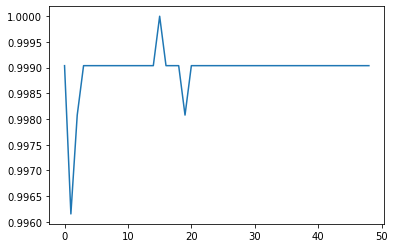

In [265]:
val_score=[]

for k in range(1,50):
    
    score=cross_val_score(RandomForestClassifier(k), X_train, y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)
    
plt.plot(val_score)

### Enregistrement des Models

In [267]:
import pickle

In [273]:
filename1 = 'svm.sav' or 'svm.text'
pickle.dump(model_1,open(filename1,'wb'))
model_load = pickle.load(open(filename1,'rb'))

In [274]:
filename2 = 'decisiontree.sav' or 'decisiontree.text'
pickle.dump(model_2,open(filename2,'wb'))
model_load = pickle.load(open(filename2,'rb'))

In [276]:
filenam3 = 'randomforest.sav' or 'randomforest.text'
pickle.dump(model_3,open(filenam3 ,'wb'))
model_load = pickle.load(open(filenam3 ,'rb'))